In [1]:
# %pip install tensorflow

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing import sequence

# Przykład pobrania zbioru danych IMDB dla NLP
max_features = 10000  # Liczba słów z korpusu
maxlen = 500  # Długość sekwencji

print('Pobieranie danych...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'sekwencji treningowych')
print(len(input_test), 'sekwencji testowych')

input_test

Pobieranie danych...
25000 sekwencji treningowych
25000 sekwencji testowych


array([list([1, 591, 202, 14, 31, 6, 717, 10, 10, 2, 2, 5, 4, 360, 7, 4, 177, 5760, 394, 354, 4, 123, 9, 1035, 1035, 1035, 10, 10, 13, 92, 124, 89, 488, 7944, 100, 28, 1668, 14, 31, 23, 27, 7479, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 2, 38, 32, 25, 7944, 451, 202, 14, 6, 717]),
       list([1, 14, 22, 3443, 6, 176, 7, 5063, 88, 12, 2679, 23, 1310, 5, 109, 943, 4, 114, 9, 55, 606, 5, 111, 7, 4, 139, 193, 273, 23, 4, 172, 270, 11, 7216, 2, 4, 8463, 2801, 109, 1603, 21, 4, 22, 3861, 8, 6, 1193, 1330, 10, 10, 4, 105, 987, 35, 841, 2, 19, 861, 1074, 5, 1987, 2, 45, 55, 221, 15, 670, 5304, 526, 14, 1069, 4, 405, 5, 2438, 7, 27, 85, 108, 131, 4, 5045, 5304, 3884, 405, 9, 3523, 133, 5, 50, 13, 104, 51, 66, 166, 14, 22, 157, 9, 4, 530, 239, 34, 8463, 2801, 45, 407, 31, 7, 41, 3778, 105, 21, 59, 299, 12, 38, 950, 5, 4521, 15, 45, 629, 488, 2733, 127, 6, 52, 292, 17, 4, 6936, 185, 132, 1988, 5304, 1799, 488, 2693, 47, 6, 392, 173, 4, 2, 4378, 270, 2352, 4, 1500, 7, 

In [3]:
import numpy as np  # Importowanie biblioteki NumPy
import tensorflow as tf  # Importowanie biblioteki TensorFlow
from tensorflow.keras.datasets import imdb  # Importowanie zestawu danych IMDb
# Importowanie modelu sekwencyjnego
from tensorflow.keras.models import Sequential
# Importowanie warstw modelu
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
# Importowanie modułu do przetwarzania sekwencji
from tensorflow.keras.preprocessing import sequence

# Przykład pobrania zbioru danych IMDB dla NLP
max_features = 10000  # Liczba słów z korpusu
maxlen = 500  # Długość sekwencji

print('Pobieranie danych...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(
    num_words=max_features)  # Wczytanie zbioru danych IMDb z ograniczeniem liczby słów
# Wyświetlenie liczby sekwencji treningowych
print(len(input_train), 'sekwencji treningowych')
# Wyświetlenie liczby sekwencji testowych
print(len(input_test), 'sekwencji testowych')

# Prosta technika obsługi danych tekstowych
print('Przygotowywanie danych...')
# Ustalenie stałej długości sekwencji treningowych
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
# Ustalenie stałej długości sekwencji testowych
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
# Wyświetlenie kształtu danych treningowych
print('input_train shape:', input_train.shape)
# Wyświetlenie kształtu danych testowych
print('input_test shape:', input_test.shape)

Pobieranie danych...
25000 sekwencji treningowych
25000 sekwencji testowych
Przygotowywanie danych...
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [22]:

# Tworzenie modelu RNN (Recurrent Neural Network)
model = Sequential()  # Inicjalizacja modelu sekwencyjnego
model.add(Embedding(max_features, 32))  # Warstwa osadzania słów
# Warstwa RNN z sekwencjami zwracanymi
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))  # Druga warstwa RNN
model.add(SimpleRNN(32, return_sequences=True))  # Trzecia warstwa RNN
model.add(SimpleRNN(32))  # Ostatnia warstwa RNN
# Warstwa wyjściowa z funkcją aktywacji sigmoidalną
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['acc'])  # Kompilacja modelu
print(model.summary())  # Wyświetlenie podsumowania modelu

# Trenowanie modelu
history = model.fit(input_train, y_train,
                    epochs=2,  # Liczba epok
                    batch_size=128,  # Rozmiar batcha
                    validation_split=0.2)  # Podział danych na treningowe i walidacyjne

# Przykład zastosowania modelu w predykcji
# Wykorzystanie modelu do przewidywania wyników
predictions = model.predict(input_test)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          320000    
                                                                 
 simple_rnn_12 (SimpleRNN)   (None, None, 32)          2080      
                                                                 
 simple_rnn_13 (SimpleRNN)   (None, None, 32)          2080      
                                                                 
 simple_rnn_14 (SimpleRNN)   (None, None, 32)          2080      
                                                                 
 simple_rnn_15 (SimpleRNN)   (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328353 (1.25 MB)
Trainable params: 32835

In [4]:
input_test

array([[   0,    0,    0, ...,   14,    6,  717],
       [   0,    0,    0, ...,  125,    4, 3077],
       [  33,    6,   58, ...,    9,   57,  975],
       ...,
       [   0,    0,    0, ...,   21,  846, 5518],
       [   0,    0,    0, ..., 2302,    7,  470],
       [   0,    0,    0, ...,   34, 2005, 2643]])

In [6]:
predictions

array([[0.23122568],
       [0.8394183 ],
       [0.7525925 ],
       ...,
       [0.36395618],
       [0.4360726 ],
       [0.93033814]], dtype=float32)

In [28]:
predictions_calc = (predictions >= 0.5).astype(int)

array([[0],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

Macierz Pomyłek:
[[0.88728 0.11272]
 [0.22232 0.77768]]


<Axes: >

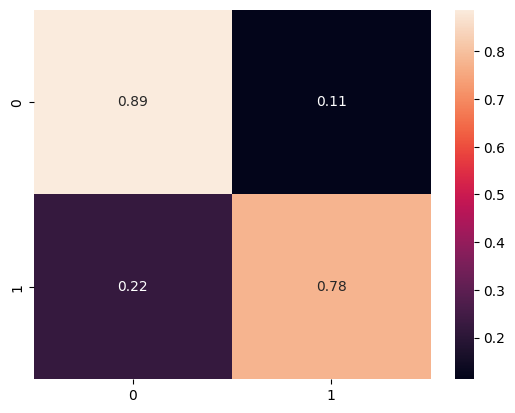

In [30]:
from sklearn.metrics import confusion_matrix

import seaborn as sns


confusion = confusion_matrix(y_test, predictions_calc, normalize='true')

print("Macierz Pomyłek:")

print(confusion)

sns.heatmap(confusion, annot=True)